In [60]:
#import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import plot_tree

In [61]:
#Preparing the CO2 data frame
co2_df = pd.read_csv("owid-co2-data.csv")
danish_co2_df = co2_df[co2_df['country'] == 'Denmark']
danish_co2_df = danish_co2_df[(danish_co2_df['year'] >= 2008) & (danish_co2_df['year'] <= 2020)]

print(danish_co2_df)

       country  year iso_code  population           gdp  cement_co2  \
11636  Denmark  2008      DNK   5502752.0  2.430906e+11       1.155   
11637  Denmark  2009      DNK   5526455.0  2.325074e+11       0.764   
11638  Denmark  2010      DNK   5550850.0  2.381902e+11       0.672   
11639  Denmark  2011      DNK   5576016.0  2.427576e+11       0.862   
11640  Denmark  2012      DNK   5600955.0  2.433075e+11       0.871   
11641  Denmark  2013      DNK   5625393.0  2.455784e+11       0.867   
11642  Denmark  2014      DNK   5650654.0  2.495552e+11       0.887   
11643  Denmark  2015      DNK   5677795.0  2.554013e+11       0.932   
11644  Denmark  2016      DNK   5706856.0  2.636915e+11       1.095   
11645  Denmark  2017      DNK   5737286.0  2.711322e+11       1.194   
11646  Denmark  2018      DNK   5766689.0  2.765265e+11       1.160   
11647  Denmark  2019      DNK   5795879.0  2.806563e+11       1.129   
11648  Denmark  2020      DNK   5825638.0  2.750584e+11       1.227   

     

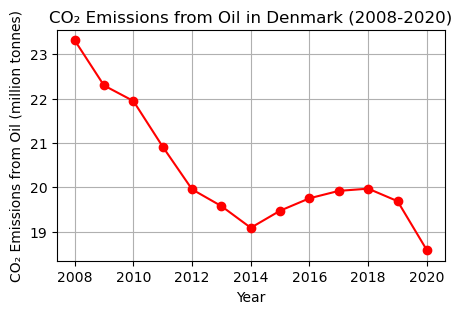

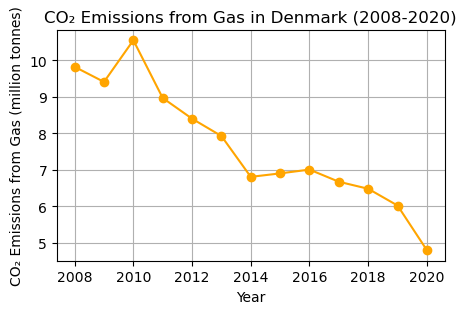

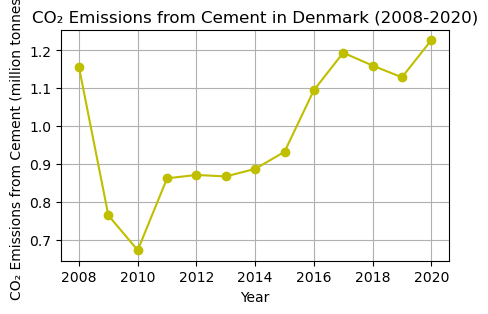

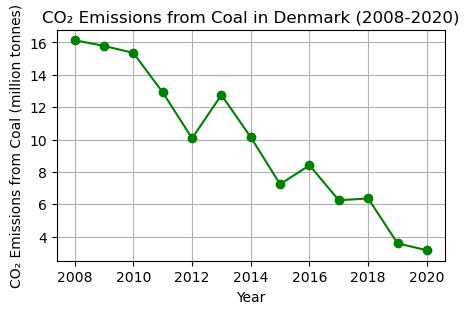

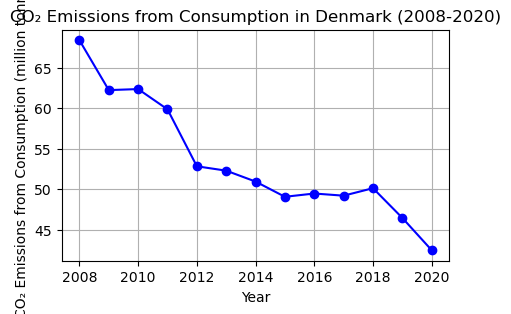

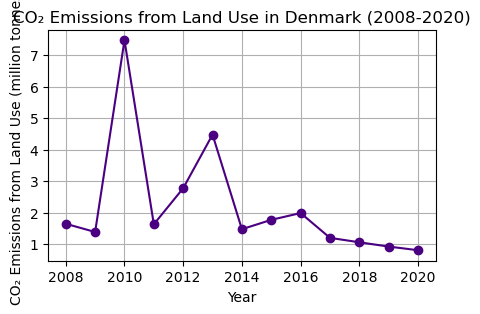

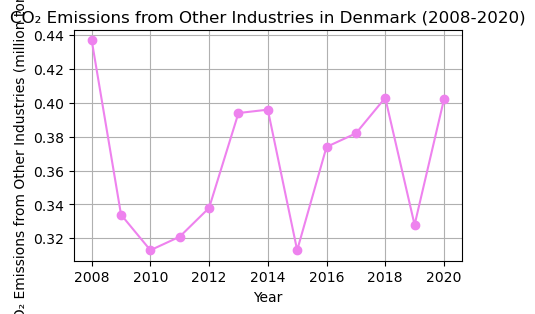

In [62]:
# CO2 in Denmark analysis by industry

# CO₂ Emissions from Cement increases after 2010
# CO₂ Emissions from Land Use increases over the years
# CO₂ Emissions from every other industry decreases over the years

oil_df = danish_co2_df[['country', 'year', 'oil_co2']]
gas_df = danish_co2_df[['country', 'year', 'gas_co2']]
cement_df = danish_co2_df[['country', 'year', 'cement_co2']]
coal_df = danish_co2_df[['country', 'year', 'coal_co2']]
consumption_df = danish_co2_df[['country', 'year', 'consumption_co2']]
land_use_df = danish_co2_df[['country', 'year', 'land_use_change_co2']]
other_df = danish_co2_df[['country', 'year', 'other_industry_co2']]

plt.figure(figsize=(5, 3))
plt.plot(oil_df['year'], oil_df['oil_co2'], marker='o', linestyle='-', color='r')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions from Oil (million tonnes)')
plt.title('CO₂ Emissions from Oil in Denmark (2008-2020)')
plt.grid(True)
plt.show()

plt.figure(figsize=(5, 3))
plt.plot(gas_df['year'], gas_df['gas_co2'], marker='o', linestyle='-', color='orange')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions from Gas (million tonnes)')
plt.title('CO₂ Emissions from Gas in Denmark (2008-2020)')
plt.grid(True)
plt.show()

plt.figure(figsize=(5, 3))
plt.plot(cement_df['year'], cement_df['cement_co2'], marker='o', linestyle='-', color='y')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions from Cement (million tonnes)')
plt.title('CO₂ Emissions from Cement in Denmark (2008-2020)')
plt.grid(True)
plt.show()

plt.figure(figsize=(5, 3))
plt.plot(coal_df['year'], coal_df['coal_co2'], marker='o', linestyle='-', color='g')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions from Coal (million tonnes)')
plt.title('CO₂ Emissions from Coal in Denmark (2008-2020)')
plt.grid(True)
plt.show()

plt.figure(figsize=(5, 3))
plt.plot(consumption_df['year'], consumption_df['consumption_co2'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions from Consumption (million tonnes)')
plt.title('CO₂ Emissions from Consumption in Denmark (2008-2020)')
plt.grid(True)
plt.show()

plt.figure(figsize=(5, 3))
plt.plot(land_use_df['year'], land_use_df['land_use_change_co2'], marker='o', linestyle='-', color='indigo')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions from Land Use (million tonnes)')
plt.title('CO₂ Emissions from Land Use in Denmark (2008-2020)')
plt.grid(True)
plt.show()

plt.figure(figsize=(5, 3))
plt.plot(other_df['year'], other_df['other_industry_co2'], marker='o', linestyle='-', color='violet')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions from Other Industries (million tonnes)')
plt.title('CO₂ Emissions from Other Industries in Denmark (2008-2020)')
plt.grid(True)
plt.show()

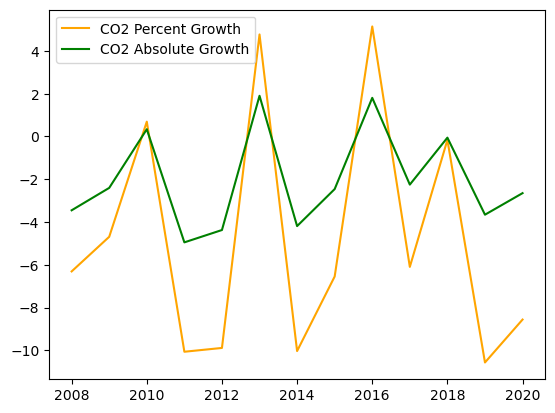

In [63]:
#CO2 in Denmark Percent and Absolute Growth
x_year = danish_co2_df['year']
y_co2 = danish_co2_df['co2']
y_co2_abs = danish_co2_df['co2_growth_abs']
y_co2_prct = danish_co2_df['co2_growth_prct']

plt.plot(x_year, y_co2_prct, label='CO2 Percent Growth', color='orange')
plt.plot(x_year, y_co2_abs, label='CO2 Absolute Growth', color='green')
plt.legend()
plt.show()

Text(0.5, 1.0, 'CO2 Levels per Year')

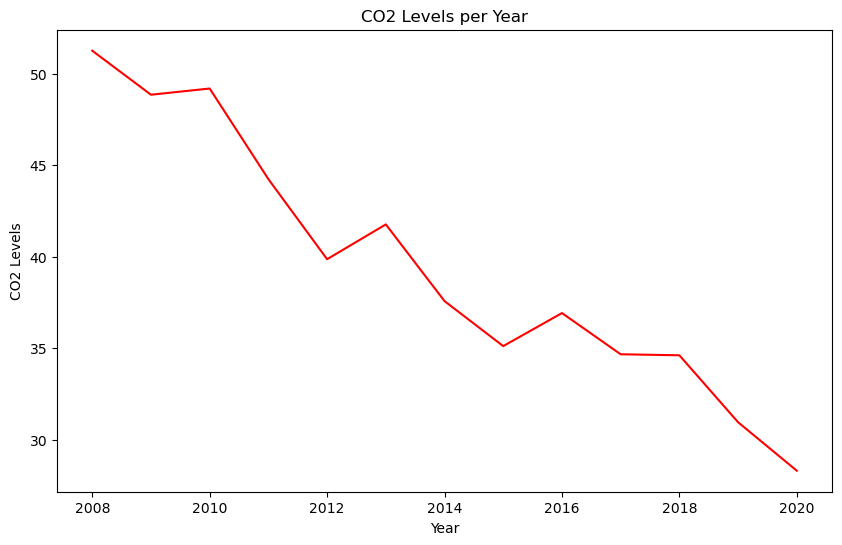

In [64]:
#CO2 Levels per Year

plt.figure(figsize=(10,6))
plt.plot(x_year, y_co2, label='CO2', color='red')
plt.xlabel('Year')
plt.ylabel('CO2 Levels')
plt.title('CO2 Levels per Year')

# The CO2 levels seem to have a somewhat steady decline after the peak just after 1995 with CO2 levels around 73 million tonnes. 
# By 2022, the CO2 levels recorded in Denmark hover around 30 million tonnes. 

Text(0.5, 1.0, 'Total GHG Levels per Year')

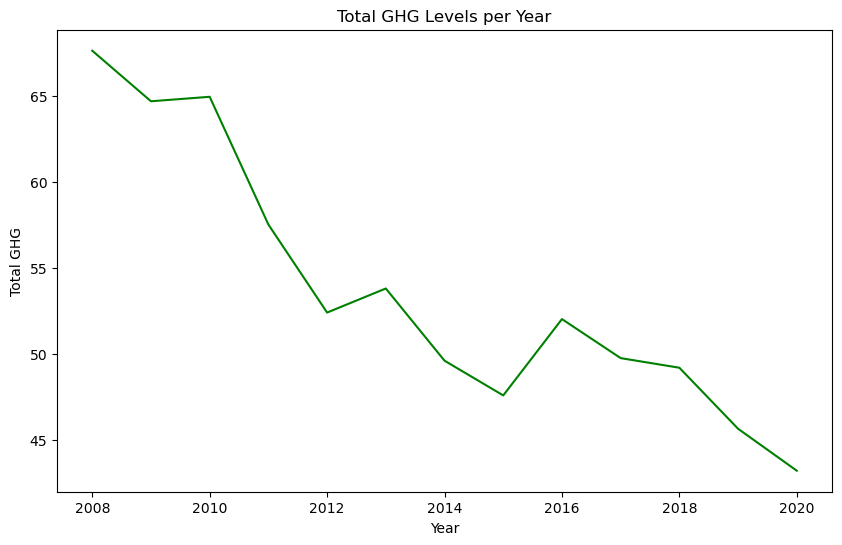

In [65]:
#Total GHG Levels per Year
y_ghg = danish_co2_df['total_ghg']

plt.figure(figsize=(10,6))
plt.plot(x_year, y_ghg, label='Total_GHG', color='green')
plt.xlabel('Year')
plt.ylabel('Total GHG')
plt.title('Total GHG Levels per Year')

# The total Green House Gases levels mimic the CO2 levels due to CO2 being a vast majority of the Green House Gases make-up. 
# The only real difference is in the numerical values of the levels. The total GHG levels reached a peak of 92 million tonnes just after 1995,
# and reached their lowest point in 2020 with a reading of 42 million tonnes. 

Text(0.5, 1.0, 'GHG Comparison per Year')

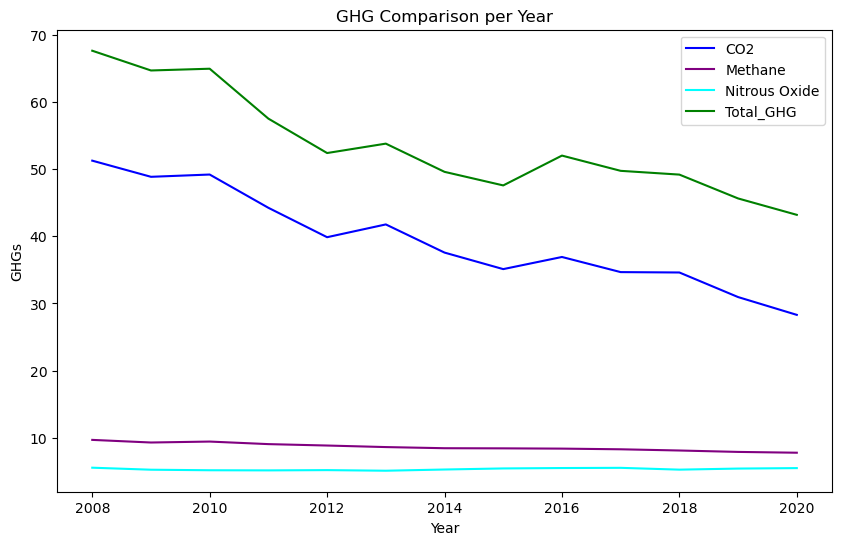

In [66]:
#GHG Comparison per Year
y_methane = danish_co2_df['methane']
y_n2o = danish_co2_df['nitrous_oxide']

plt.figure(figsize=(10,6))
plt.plot(x_year, y_co2, label='CO2', color='blue')
plt.plot(x_year, y_methane, label='Methane', color='purple')
plt.plot(x_year, y_n2o, label='Nitrous Oxide', color='cyan')
plt.plot(x_year, y_ghg, label='Total_GHG', color='green')
plt.xlabel('Year')
plt.ylabel('GHGs')
plt.legend()
plt.title('GHG Comparison per Year')

# This graph gives a very good visualization of the disparity in the make up of the Green House Gas levels. 

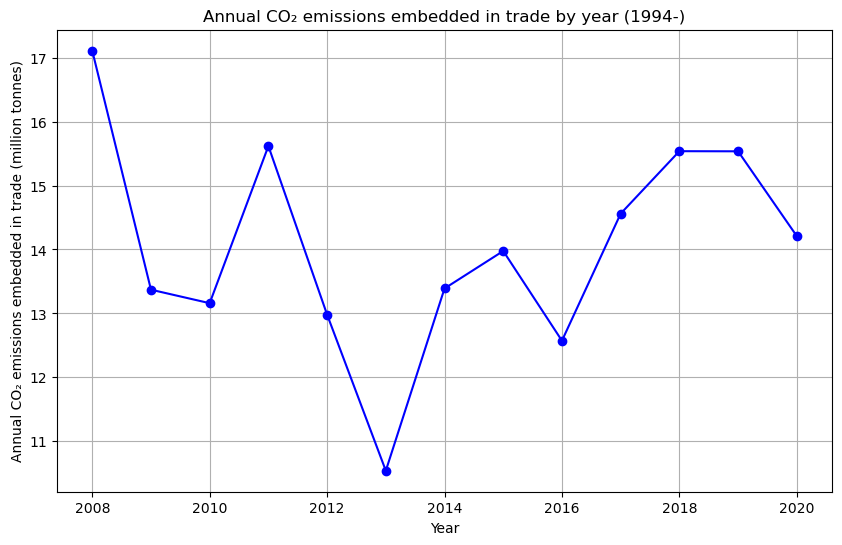

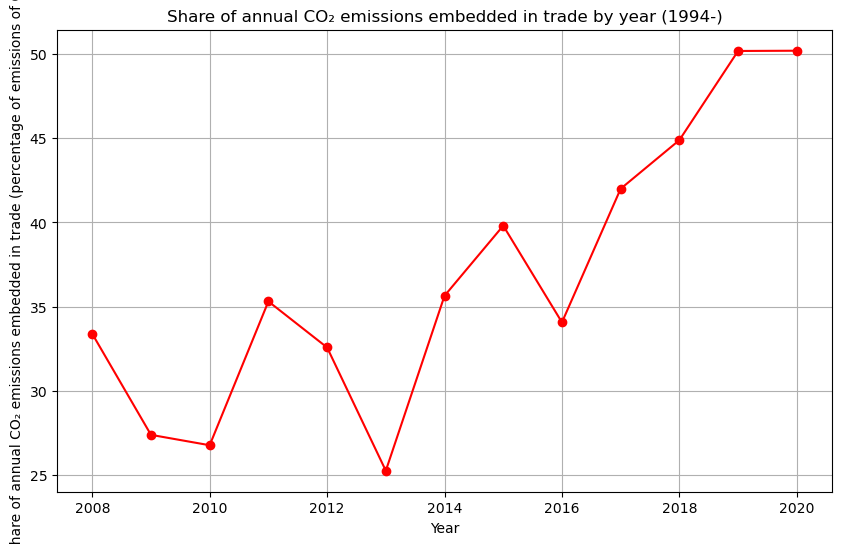

In [67]:
#Trade by CO2 in Denmark analysis
trade_df = danish_co2_df[['country', 'year', 'trade_co2']]
trade_share_df = danish_co2_df[['country', 'year', 'trade_co2_share']]

plt.figure(figsize=(10, 6))
plt.plot(trade_df['year'], trade_df['trade_co2'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Annual CO₂ emissions embedded in trade (million tonnes)')
plt.title('Annual CO₂ emissions embedded in trade by year (1994-)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(trade_share_df['year'], trade_share_df['trade_co2_share'], marker='o', linestyle='-', color='r')
plt.xlabel('Year')
plt.ylabel('Share of annual CO₂ emissions embedded in trade (percentage of emissions of CO₂)')
plt.title('Share of annual CO₂ emissions embedded in trade by year (1994-)')
plt.grid(True)
plt.show()

In [68]:
#Importing and processing bird data
all_birds_df= pd.read_csv("all_birds_separate.csv")
print(all_birds_df)

species_columns = [f'SPECIES{i}' for i in range(1, 21)]  

all_birds_subset = all_birds_df.loc[(all_birds_df['OBSERVATION DATE'] >= 2008) & (all_birds_df['OBSERVATION DATE'] <= 2020)]
all_birds_vals = all_birds_subset[species_columns]  

all_danish_co2 = danish_co2_df[['co2', 'cement_co2', 'co2_including_luc', 'coal_co2', 'consumption_co2', 
                                'cumulative_cement_co2', 'cumulative_coal_co2', 'cumulative_flaring_co2',
                                'cumulative_gas_co2', 'cumulative_luc_co2', 'cumulative_oil_co2', 
                                'cumulative_other_co2', 'flaring_co2', 'gas_co2', 'land_use_change_co2',
                                'oil_co2', 'other_industry_co2', 'total_ghg', 'total_ghg_excluding_lucf', 'trade_co2']]

X_log = np.log1p(all_danish_co2)   
y_log = np.log1p(all_birds_vals)  

#Confirming both bird and CO2 data have same shape
print(all_birds_vals.shape)  
print(all_danish_co2.shape)  

    OBSERVATION DATE  SPECIES1  SPECIES2  SPECIES3  SPECIES4  SPECIES5  \
0               1994         2         1         3         4         2   
1               1995         5         4         5        23         6   
2               1996         8         7         9        24         6   
3               1997         0         0         1        21         2   
4               1998         5         4         4        13         5   
5               1999         6         5         1        20         1   
6               2000         6         8         4        16         2   
7               2001         5         7         3        17        11   
8               2002         3         6         1        11         4   
9               2003        19         8        12        31        13   
10              2004        12         8         4        27         7   
11              2005         7         2         1        17         3   
12              2006        16        

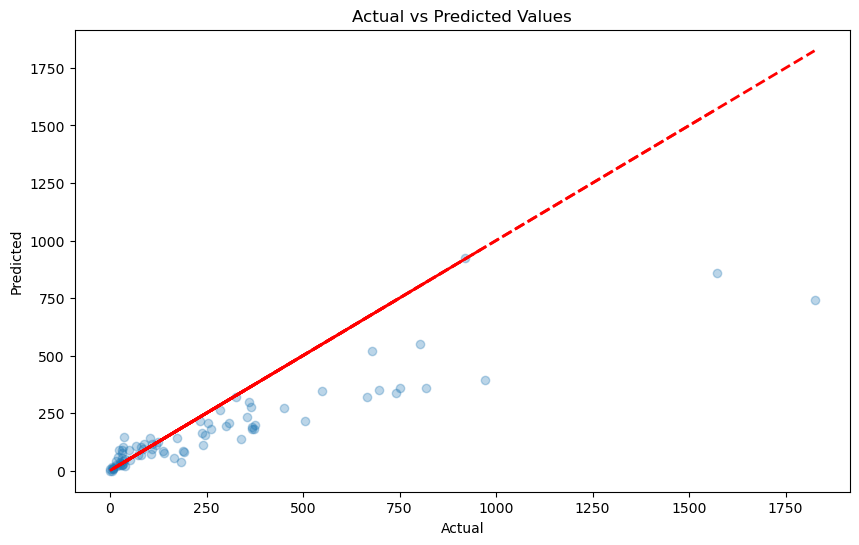

R^2 Score: 0.6680182706452598
Mean Squared Error (Log-Transformed Data): 0.5068620467021747
Mean Squared Error (Original Scale): 42571.57189880763
Root Mean Squared Error (Original Scale): 206.32879561226454


In [69]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log, y_log, test_size=0.30, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train_log, y_train_log)

y_pred_log = linear_model.predict(X_test_log)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.3)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

#Calculate R^2 on original scale
r_squared = linear_model.score(X_test_log, y_test_log)  
print(f"R^2 Score: {r_squared}")

#Calculate MSE on log-transformed data
mse_log = mean_squared_error(y_test_log, y_pred_log)
print(f"Mean Squared Error (Log-Transformed Data): {mse_log}")

#Calculate Mean Squared Error (MSE) on the original scale
y_pred_original = np.expm1(y_pred_log)   
y_test_original = np.expm1(y_test_log)   
mse_original = mean_squared_error(y_test_original, y_pred_original)
print(f"Mean Squared Error (Original Scale): {mse_original}")

#Calculate Root Mean Squared Error (RMSE)
rmse_original = np.sqrt(mse_original)
print(f"Root Mean Squared Error (Original Scale): {rmse_original}")

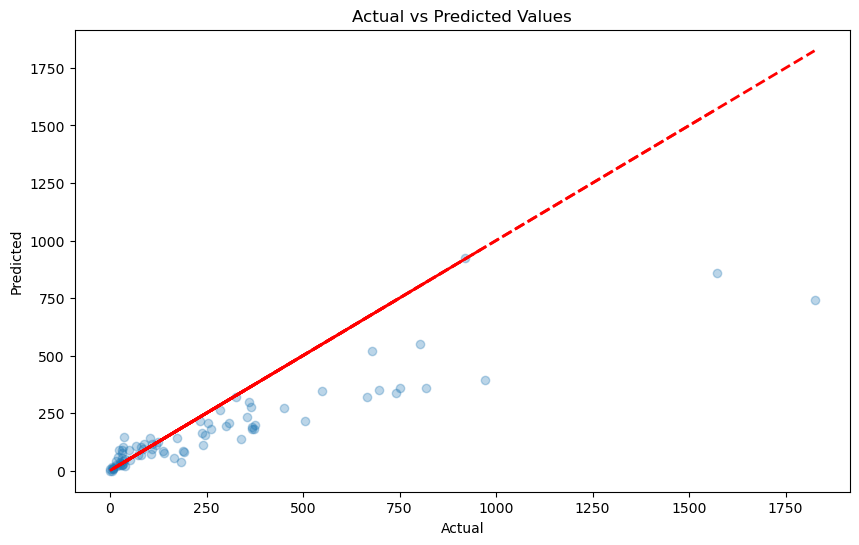

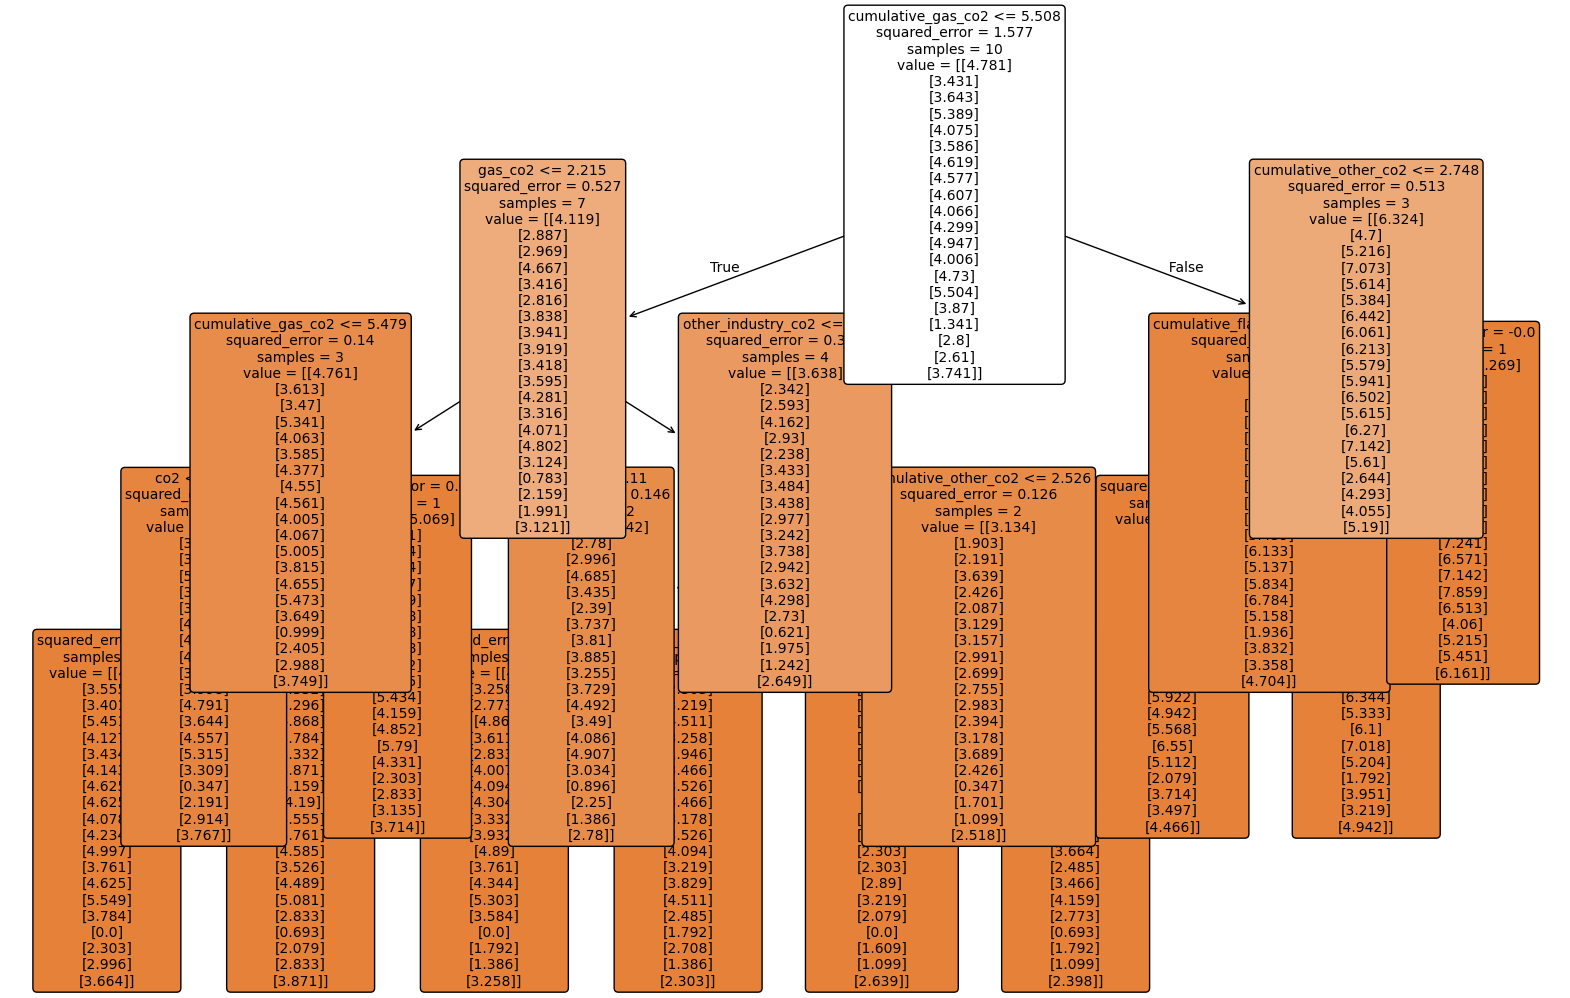

R^2 Score: 0.6550567948899116
Mean Squared Error (Log-Transformed Data): 0.5772428540562522
Mean Squared Error (Original Scale): 38676.616666666654
Root Mean Squared Error (Original Scale): 196.6637146671105


In [70]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log, y_log, test_size=0.2, random_state=42)

decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train_log, y_train_log)

y_pred_log = decision_tree_model.predict(X_test_log)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.3)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

#Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree_model, feature_names=all_danish_co2.columns, filled=True, rounded=True, fontsize=10)
plt.show()

#Calculate R^2 on original scale
r_squared = decision_tree_model.score(X_test_log, y_test_log)  
print(f"R^2 Score: {r_squared}")

#Calculate Mean Squared Error (MSE) on log-transformed data
mse_log = mean_squared_error(y_test_log, y_pred_log)
print(f"Mean Squared Error (Log-Transformed Data): {mse_log}")

#Calculate Mean Squared Error (MSE) on the original scale
y_pred_original = np.expm1(y_pred_log)   
y_test_original = np.expm1(y_test_log)   
mse_original = mean_squared_error(y_test_original, y_pred_original)
print(f"Mean Squared Error (Original Scale): {mse_original}")

#Calculate Root Mean Squared Error (RMSE)
rmse_original = np.sqrt(mse_original)
print(f"Root Mean Squared Error (Original Scale): {rmse_original}")

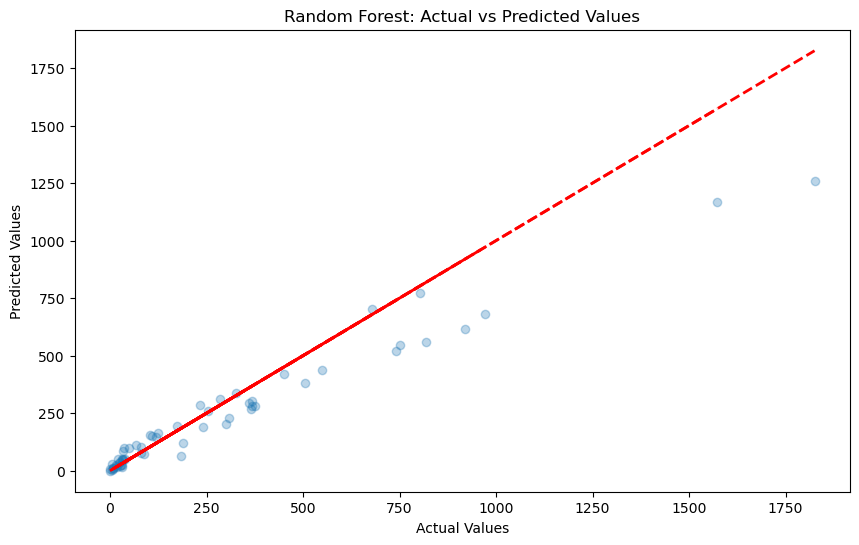

R-squared: 0.7839313153615324
Mean Squared Error (Log-Transformed Data): 0.2707782976908418
Mean Squared Error (Original Scale): 15802.639730992047
Root Mean Squared Error (Original Scale): 125.70855074732206
Mean Absolute Error (Original Scale): 69.09274215002745


In [74]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_log, y_train_log)

y_pred_log_rf = random_forest_model.predict(X_test_log)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original_rf, alpha=0.3)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted Values')
plt.show()

#Calculate R^2 on original scale
r2_rf = r2_score(y_test_original, y_pred_original_rf)
print(f"R-squared: {r2_rf}")

#Calculate Mean Squared Error (MSE) on log-transformed data
mse_log_rf = mean_squared_error(y_test_log, y_pred_log_rf)
print(f"Mean Squared Error (Log-Transformed Data): {mse_log_rf}")

#Calculate Mean Squared Error (MSE) on the original scale
y_pred_original_rf = np.expm1(y_pred_log_rf)
y_test_original = np.expm1(y_test_log)  # Ensure y_test_original is defined here
mse_original_rf = mean_squared_error(y_test_original, y_pred_original_rf)
print(f"Mean Squared Error (Original Scale): {mse_original_rf}")

#Calculate Root Mean Squared Error (RMSE)
rmse_original_rf = np.sqrt(mse_original_rf)
print(f"Root Mean Squared Error (Original Scale): {rmse_original_rf}")

#Calculate Mean Absolute Error (MAE) on original scale
mae_original_rf = mean_absolute_error(y_test_original, y_pred_original_rf)
print(f"Mean Absolute Error (Original Scale): {mae_original_rf}")

In [72]:
def corr(df1, df2):
    n = len(df1)
    v1, v2 = df1.values, df2.values
    sums = np.multiply.outer(v2.sum(0), v1.sum(0))
    stds = np.multiply.outer(v2.std(0), v1.std(0))
    return pd.DataFrame((v2.T.dot(v1) - sums / n) / stds / n,
                        df2.columns, df1.columns)

corr_matrix = corr(all_birds_vals, all_danish_co2)
corr_matrix

,SPECIES1,SPECIES2,SPECIES3,SPECIES4,SPECIES5,SPECIES6,SPECIES7,SPECIES8,SPECIES9,SPECIES10,SPECIES11,SPECIES12,SPECIES13,SPECIES14,SPECIES15,SPECIES16,SPECIES17,SPECIES18,SPECIES19,SPECIES20
co2,-0.756331,-0.827785,-0.678453,-0.790622,-0.750573,-0.698917,-0.742558,-0.772647,-0.744249,-0.710507,-0.715578,-0.808164,-0.725368,-0.759660,-0.799866,-0.745308,-0.640023,-0.694477,-0.671470,-0.717975
cement_co2,0.654441,0.688756,0.576325,0.688877,0.657887,0.591186,0.651180,0.675541,0.638812,0.613789,0.624786,0.692811,0.625075,0.660541,0.697430,0.645369,0.487688,0.615077,0.520458,0.636789
co2_including_luc,-0.747207,-0.821157,-0.667733,-0.782828,-0.743113,-0.689577,-0.736123,-0.766491,-0.737591,-0.703264,-0.707334,-0.800727,-0.716835,-0.751491,-0.793757,-0.739691,-0.617592,-0.681265,-0.660376,-0.711926
coal_co2,-0.779157,-0.862319,-0.696639,-0.820016,-0.773819,-0.712072,-0.769871,-0.795569,-0.766814,-0.727596,-0.734466,-0.840116,-0.746313,-0.785185,-0.833247,-0.768011,-0.660869,-0.717382,-0.691168,-0.733634
consumption_co2,-0.694860,-0.746885,-0.618872,-0.720683,-0.682722,-0.645299,-0.677604,-0.706744,-0.677842,-0.647664,-0.654963,-0.733577,-0.662472,-0.691816,-0.724605,-0.681823,-0.590068,-0.635935,-0.615128,-0.658381
cumulative_cement_co2,0.834262,0.907792,0.759097,0.882117,0.838427,0.769702,0.826415,0.856699,0.826444,0.788301,0.798486,0.895136,0.809039,0.848871,0.893807,0.822597,0.699019,0.784044,0.732101,0.801878
cumulative_coal_co2,0.682720,0.772767,0.590327,0.735310,0.681919,0.609514,0.667078,0.706590,0.668693,0.625610,0.637896,0.753854,0.649729,0.693707,0.748925,0.667878,0.536106,0.619404,0.573397,0.640618
cumulative_flaring_co2,0.762336,0.848366,0.675766,0.815125,0.764180,0.690015,0.750872,0.785983,0.751040,0.708297,0.720485,0.831833,0.732351,0.775900,0.828940,0.748782,0.618291,0.704530,0.654267,0.722779
cumulative_gas_co2,0.748716,0.833692,0.662832,0.799533,0.749718,0.678666,0.736053,0.771692,0.737145,0.695439,0.707039,0.816389,0.718632,0.761250,0.812666,0.735032,0.607328,0.689948,0.643318,0.709970
cumulative_luc_co2,0.654722,0.743058,0.561931,0.704626,0.652786,0.581480,0.636219,0.676666,0.638502,0.596600,0.608823,0.723704,0.620285,0.663676,0.717467,0.637807,0.513365,0.591981,0.547234,0.611966


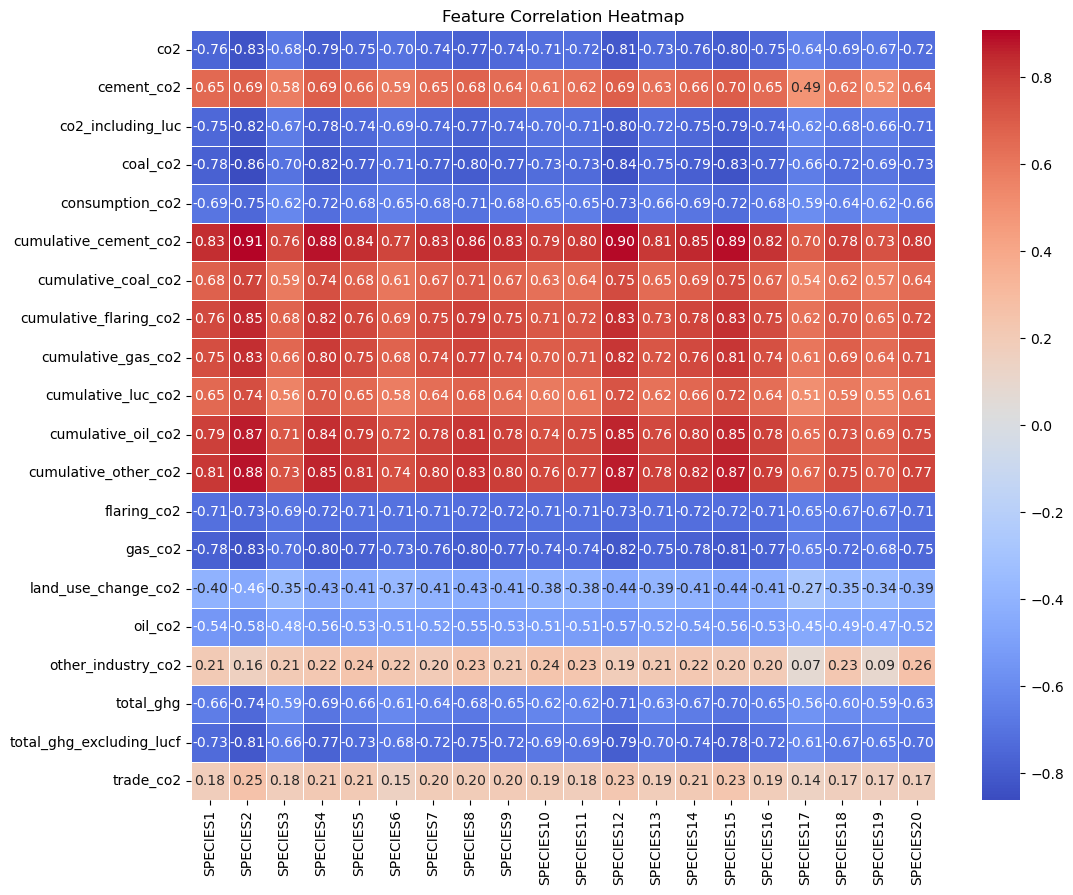

In [73]:
thresh = 0.8
#get correlation matrix
df_corr = corr_matrix.abs().unstack()
#filter
df_corr_filt = df_corr[(df_corr>thresh) | (df_corr<-thresh)].reset_index()
#deduplicate
df = df_corr_filt.iloc[df_corr_filt[['level_0','level_1']].apply(lambda r: ''.join(map(str, sorted(r))), axis = 1).drop_duplicates().index]

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()